# Proyecto Fin de Máster (PFM) - Pasos iniciales

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns


In [43]:
Equipos = pd.read_excel('Equipos_Liga_Santander_202021.xlsx')

In [44]:
Equipos.head()

,Equipo,Nombre Completo,Abrebiatura,Estadio,Latitud,Longitud,Altitud,Distancia,Tiempo_Viaje
0,Atlético,Club Atlético de Madrid,ATM,Wanda Metropolitano,40°26′10″N,3°35′58″O,664,677,1h 10min
1,Real Madrid,Real Madrid Club de Fútbol,RMA,Santigo Bernabeu,40°27′11″N,3°41′18″O,698,678,1h 10min
2,Barcelona,Fútbol Club Barcelona,FCB,Camp Nou,41°22′51″N,2°07′21″E,190,1141,1h 40min
3,Sevilla,Sevilla Fútbol Club,SEV,Ramón Sánchez-Pizjuán,37°23′02″N,5°58′14″O,14,727,1h 25min
4,Real Sociedad,Real Sociedad S.A.D.,RSO,Anoeta,43°18′05″N,1°58′25″O,191,757,NaN


In [45]:
# Escalar las variables Altitud y Distancia
Equipos['Altitud_std'] = Equipos['Altitud']
Equipos['Distancia_std'] = Equipos['Distancia']

Equipos[['Altitud_std', 'Distancia_std']] = StandardScaler().fit_transform(Equipos[['Altitud', 'Distancia']])

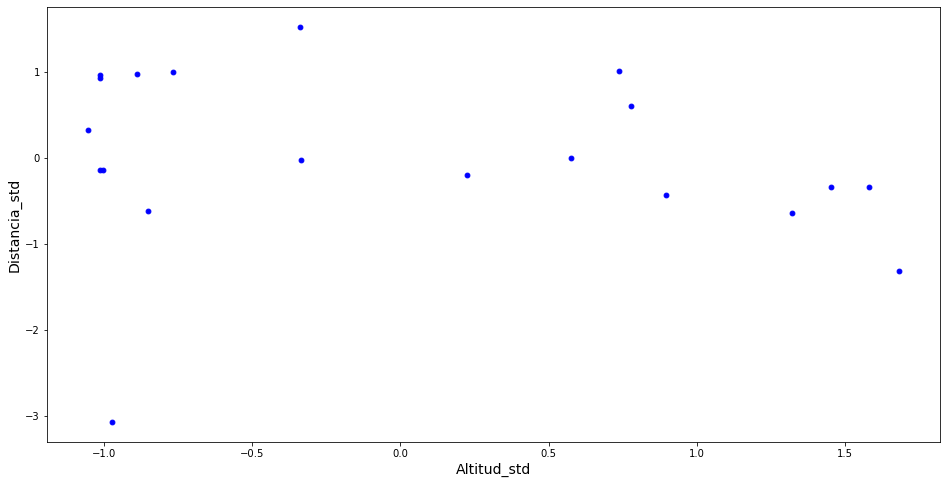

In [46]:
# Visualizamos los datos
X3 = Equipos[['Altitud_std', 'Distancia_std']].values
plt.figure(figsize=(16, 8))
plt.scatter(X3[:, 0], X3[:, 1], c=None, s=23, color='blue')
plt.xlabel("Altitud_std", fontsize=14)
plt.ylabel("Distancia_std", fontsize=14, rotation=90)
plt.show()

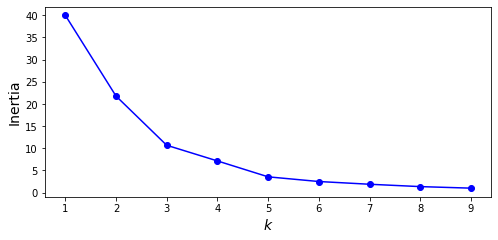

In [47]:
#Obtención del númeor de clusters

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X3)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [48]:
def Exec_KMeans(k, X):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    
    print("Centros de los clusters: ", kmeans.cluster_centers_)
    
    plt.figure(figsize=(16, 6))
    cl = ['red', 'green', 'blue', 'black', 'yellow']
    assign = []
    for row in y_pred:
        assign.append(cl[row])
        
    plt.scatter(X[:,0], X[:,1], c=assign, s=70)
    
    plt.show()
    
    return y_pred

Centros de los clusters:  [[ 1.38688794 -0.61720079]
 [-0.8279026   0.47534334]
 [ 0.5791919   0.35162108]
 [-0.97218125 -3.07391382]]


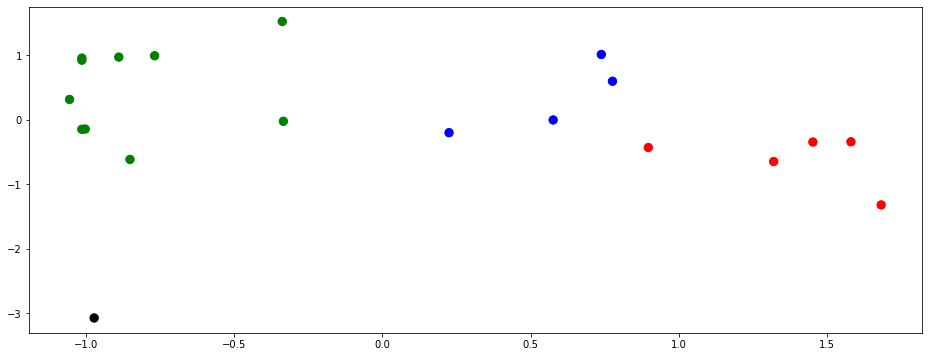

In [32]:
# Ejecutamos KMeans con el número de clusters (K) que hayas elegido y guardalo en una variable 'Cluster'
# en el dataset original (dt, si es tu caso)
selectedK = 4
y_pred = Exec_KMeans(selectedK, X3)

Centros de los clusters:  [[ 1.38688794 -0.61720079]
 [-0.8279026   0.47534334]
 [ 0.5791919   0.35162108]
 [-0.97218125 -3.07391382]]


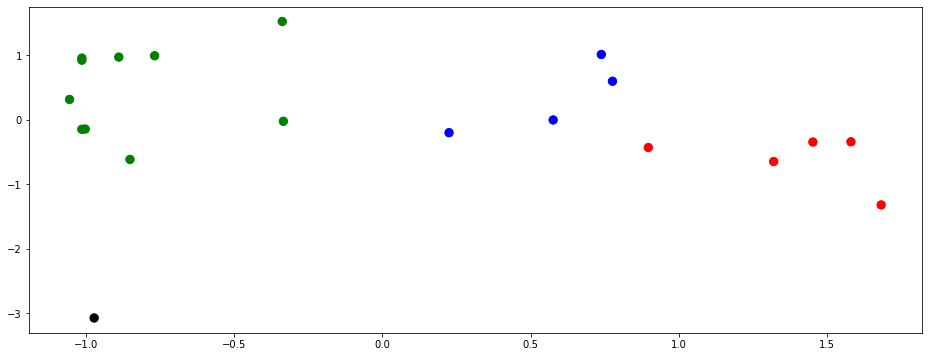

,Equipo,Nombre Completo,Abrebiatura,Estadio,Latitud,Longitud,Altitud,Distancia,Tiempo_Viaje,Altitud_std,Distancia_std,Cluster
0,Atlético,Club Atlético de Madrid,ATM,Wanda Metropolitano,40°26′10″N,3°35′58″O,664,677,1h 10min,1.452606,-0.345576,0
1,Real Madrid,Real Madrid Club de Fútbol,RMA,Santigo Bernabeu,40°27′11″N,3°41′18″O,698,678,1h 10min,1.581022,-0.341546,0
2,Barcelona,Fútbol Club Barcelona,FCB,Camp Nou,41°22′51″N,2°07′21″E,190,1141,1h 40min,-0.337657,1.524363,1
3,Sevilla,Sevilla Fútbol Club,SEV,Ramón Sánchez-Pizjuán,37°23′02″N,5°58′14″O,14,727,1h 25min,-1.002397,-0.144074,1
4,Real Sociedad,Real Sociedad S.A.D.,RSO,Anoeta,43°18′05″N,1°58′25″O,191,757,NaN,-0.333880,-0.023173,1


In [49]:
Equipos['Cluster'] = Exec_KMeans(selectedK, X3)
Equipos.head()

In [50]:
print("Cluster 0")
print("La media de Altitud es", round(Equipos[Equipos['Cluster']==0]['Altitud'].mean(), 2))
print("La media de Distancia es ", round(Equipos[Equipos['Cluster']==0]['Distancia'].mean(), 2))
print("-----------")
print("Cluster 1")
print("La media de Altitud es", round(Equipos[Equipos['Cluster']==1]['Altitud'].mean(), 2))
print("La media de Distancia es ", round(Equipos[Equipos['Cluster']==1]['Distancia'].mean(), 2))
print("-----------")
print("Cluster 2")
print("La media de Altitud es ", round(Equipos[Equipos['Cluster']==2]['Altitud'].mean(), 2))
print("La media de Distancia es ", round(Equipos[Equipos['Cluster']==2]['Distancia'].mean(), 2))
("-----------")
print("Cluster 3")
print("La media de Altitud es ", round(Equipos[Equipos['Cluster']==3]['Altitud'].mean(), 2))
print("La media de Distancia es ", round(Equipos[Equipos['Cluster']==3]['Distancia'].mean(), 2))

Cluster 0
La media de Altitud es 646.6
La media de Distancia es  609.6
-----------
Cluster 1
La media de Altitud es 60.2
La media de Distancia es  880.7
-----------
Cluster 2
La media de Altitud es  432.75
La media de Distancia es  850.0
Cluster 3
La media de Altitud es  22.0
La media de Distancia es  0.0


In [51]:
Equipos.sort_values(by=['Cluster'], ascending=True)

,Equipo,Nombre Completo,Abrebiatura,Estadio,Latitud,Longitud,Altitud,Distancia,Tiempo_Viaje,Altitud_std,Distancia_std,Cluster
0,Atlético,Club Atlético de Madrid,ATM,Wanda Metropolitano,40°26′10″N,3°35′58″O,664,677,1h 10min,1.452606,-0.345576,0
1,Real Madrid,Real Madrid Club de Fútbol,RMA,Santigo Bernabeu,40°27′11″N,3°41′18″O,698,678,1h 10min,1.581022,-0.341546,0
15,Alavés,Deportivo Alavés S.A.D.,ALV,Mendizorroza,42°50′14″N,2°41′17″O,517,656,NaN,0.897398,-0.430207,0
14,Getafe,Getafe Club de Futbol S.A.D.,GET,Coliseum Alfonso Pérez,40°19′32″N,3°42′53″O,629,602,1h 10min,1.320414,-0.647829,0
18,Real Valladolid,Real Valladolid Club de Futbol S.A.D.,VLL,José Zorrilla,41°38′40″N,4°45′40″O﻿,725,435,NaN,1.682999,-1.320846,0
16,Elche,Elche Club de Futbol S.A.D.,ELC,Martínez Valero,38°16′01″N,0°39′48″O,76,1009,1h 30min,-0.768227,0.992398,1
13,Levante,Levante Unión Deportiva S.A.D.,LEV,Ciutat de Valencia,39°29′41″N,0°21′51″O,11,992,1h 20min,-1.013727,0.923887,1
12,Valencia,Valencia Club de Futbol S.A.D.,VAL,Mestalla,39°28′29″N,0°21′30″O,11,1000,1h 20min,-1.013727,0.956127,1
11,Cádiz,Cádiz Club de Fútbol S.A.D.,CDZ,Nuevo Mirandilla,36°30′10″N,6°16′23″O,0,841,NaN,-1.055274,0.315351,1
9,Athletic,Athletic Club,ATH,San Mamés,43°15′51″N,2°56′58″O,54,610,1h 10min,-0.851320,-0.615589,1


In [78]:
Jornadas = pd.read_excel('jornadas.xlsx')

In [79]:
Jornadas_2 = pd.merge(Jornadas, Equipos, left_on='Rival', right_on='Equipo')

In [80]:
Jornadas.shape

(38, 8)

In [81]:
Jornadas_2.shape

(38, 20)

In [82]:
Jornadas_2.to_excel('Jornadas_2.xlsx', index=False)

In [83]:
# Leer F24

In [84]:
import csv
import xml.etree.ElementTree as et
import numpy as np
from datetime import datetime as dt


In [86]:
tree = et.ElementTree(file = "Datos/f24/f24-23-2020-2136204-eventdetails.xml")
games = tree.getroot()


In [87]:
match_details = games[0].attrib
match_details

{'id': '2136204',
 'additional_info': 'Behind Closed Doors',
 'away_score': '0',
 'away_team_id': '176',
 'away_team_name': 'Celta de Vigo',
 'competition_id': '23',
 'competition_name': 'Spanish La Liga',
 'game_date': '2020-09-12T15:00:00',
 'home_score': '0',
 'home_team_id': '953',
 'home_team_name': 'Eibar',
 'matchday': '1',
 'period_1_start': '2020-09-12T15:01:14',
 'period_2_start': '2020-09-12T16:01:59',
 'season_id': '2020',
 'season_name': 'Season 2020/2021'}

In [98]:
tree

In [88]:
games

<Element 'Games' at 0x7fa1ba22a490>

In [89]:
type(games)

xml.etree.ElementTree.Element

In [91]:
eventos = pd.read_html("Datos/f24/f24-23-2020-2136204-eventdetails.xml")


ValueError: No tables found